Found 676 matched files. Selecting 5 random samples...


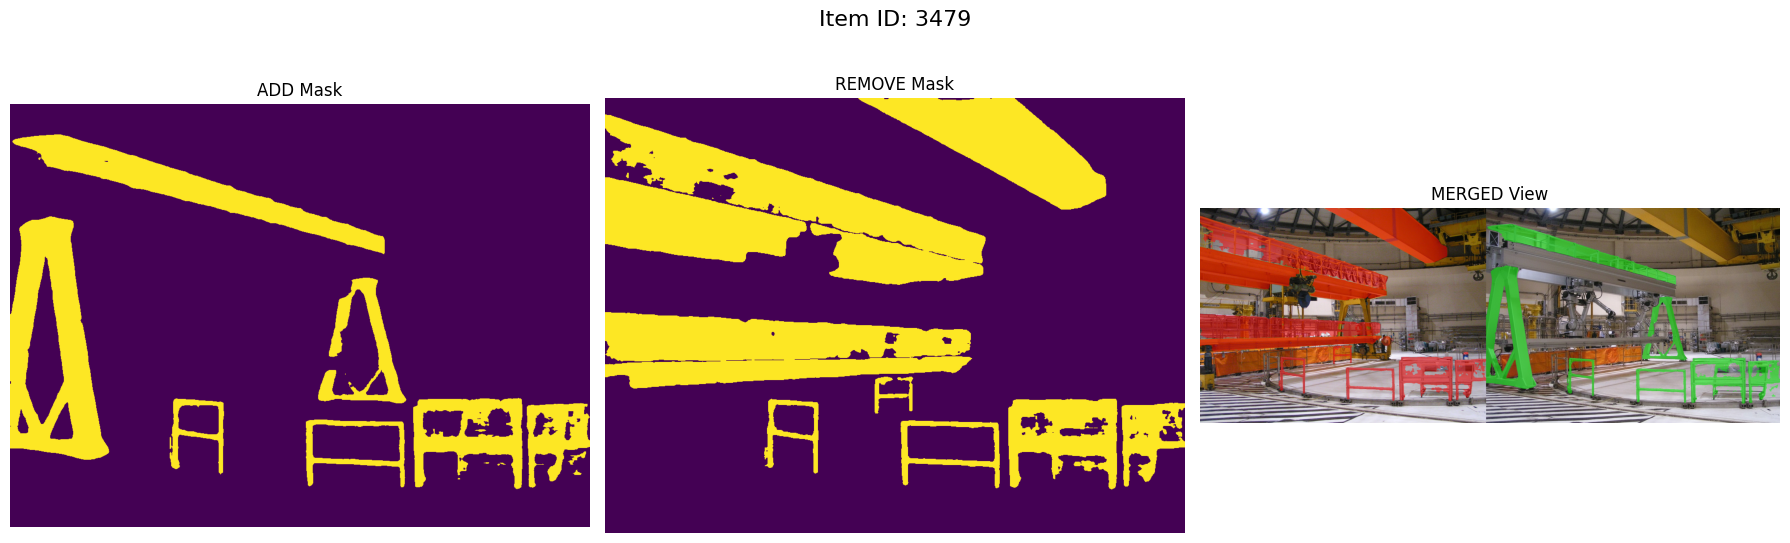

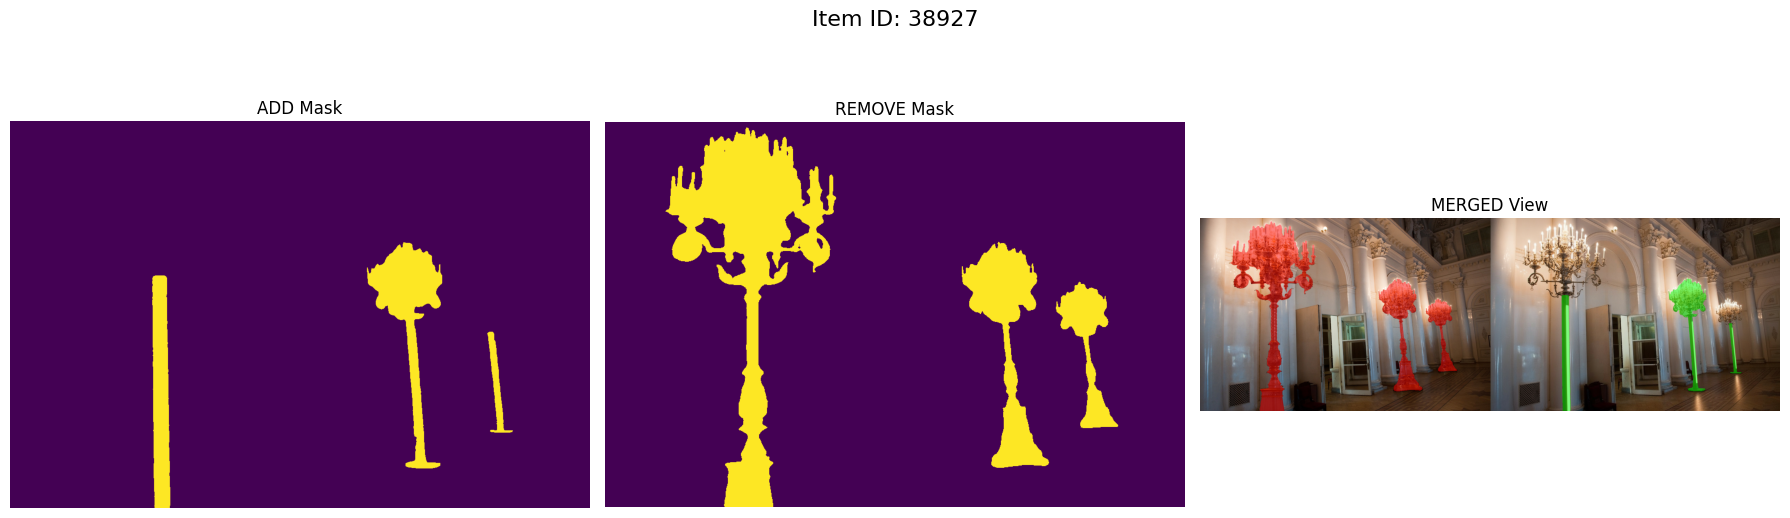

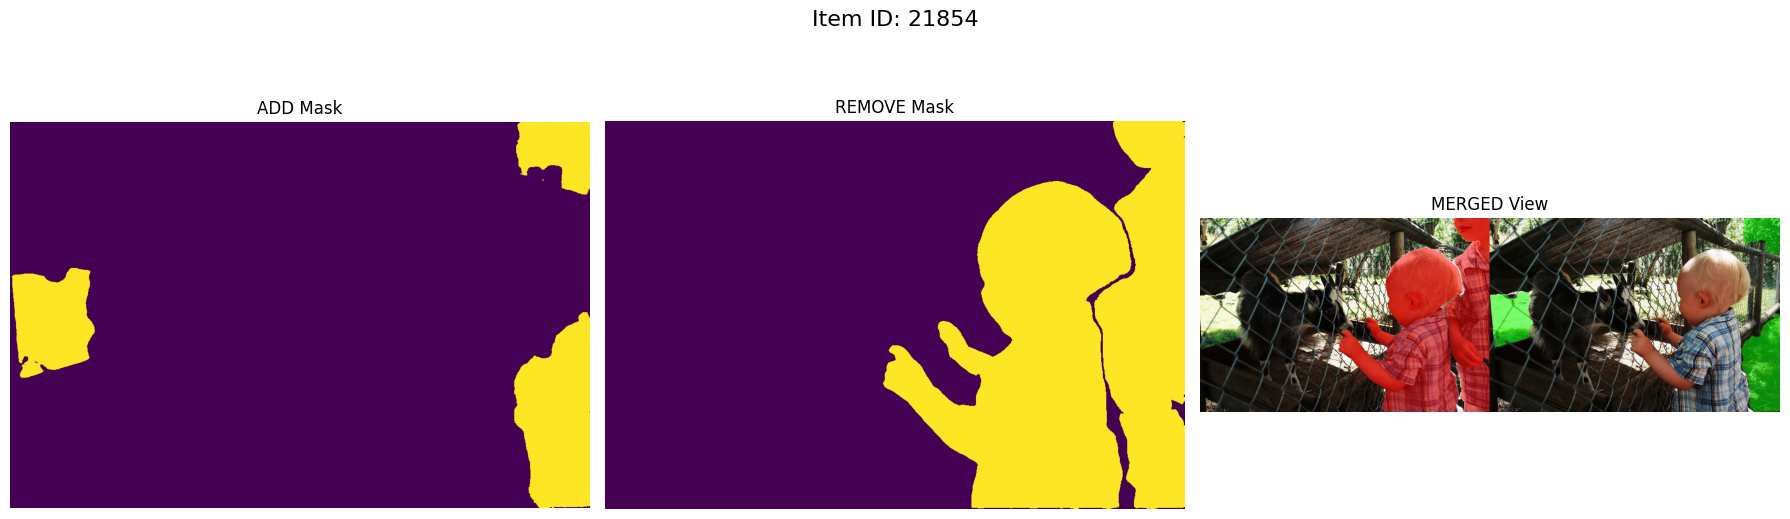

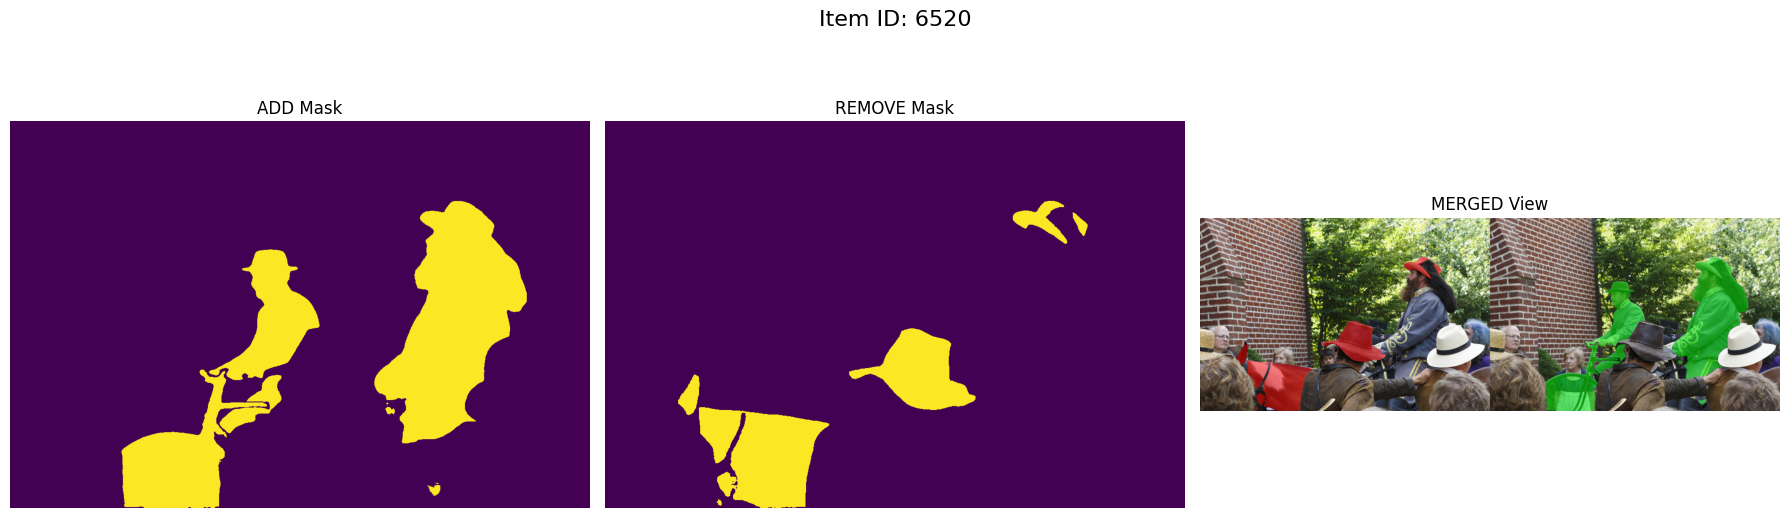

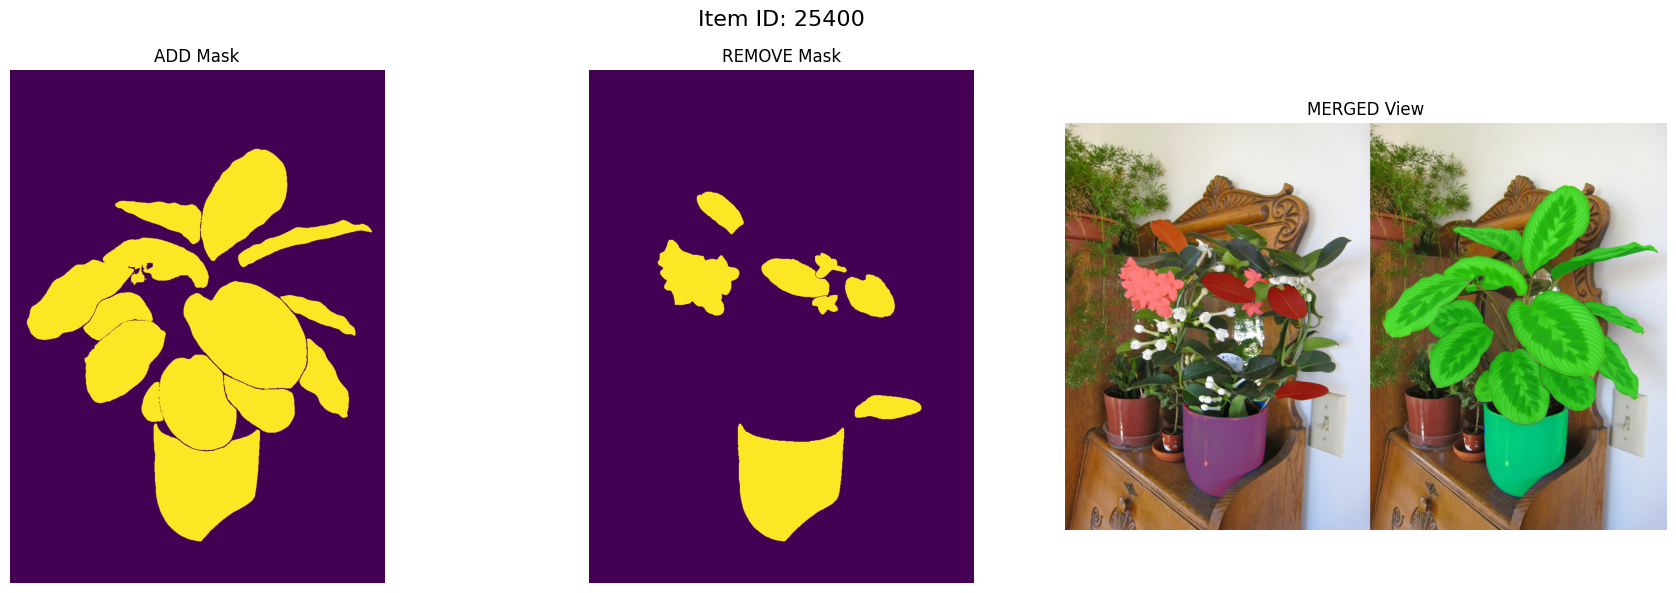

: 

In [37]:
import os
import random
import re
import matplotlib.pyplot as plt
from PIL import Image

# --- 配置 ---
# 匹配文件列表路径
INPUT_LIST_FILE = "matched_audit_files.txt"
# 图片根目录 (请根据您的 Jupyter Notebook 运行位置调整相对路径)
IMG_BASE_DIR = "pico-banana-400k-subject_driven/openimages/pico_sam_output_ALL_20251206_032609"
# 展示样本数量
NUM_SAMPLES = 5

def show_random_samples():
    if not os.path.exists(INPUT_LIST_FILE):
        print(f"Error: {INPUT_LIST_FILE} not found. Please run the query script first.")
        return

    with open(INPUT_LIST_FILE, 'r') as f:
        files = [line.strip() for line in f if line.strip()]

    if not files:
        print("No files found in matched_audit_files.txt.")
        return

    print(f"Found {len(files)} matched files. Selecting {NUM_SAMPLES} random samples...")
    selected_files = random.sample(files, min(NUM_SAMPLES, len(files)))

    for filepath in selected_files:
        # 提取 item_id
        match = re.search(r"item_(\d+)_dino_audit\.json", filepath)
        if not match:
            continue
            
        item_id = match.group(1)
        item_dir = f"item_{item_id}"
        
        # 构建路径
        paths = {
            "ADD Mask": os.path.join(IMG_BASE_DIR, item_dir, f"item_{item_id}_MASK_ADD.png"),
            "REMOVE Mask": os.path.join(IMG_BASE_DIR, item_dir, f"item_{item_id}_MASK_REMOVE.png"),
            "MERGED View": os.path.join(IMG_BASE_DIR, item_dir, f"item_{item_id}_MERGED.png")
        }
        
        # 检查并加载图片
        images = []
        titles = []
        
        for title, p in paths.items():
            if os.path.exists(p):
                try:
                    img = Image.open(p)
                    images.append(img)
                    titles.append(title)
                except Exception as e:
                    print(f"Error loading {p}: {e}")
            else:
                print(f"File not found: {p}")

        if not images:
            continue

        # 绘图
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Item ID: {item_id}", fontsize=16)
        
        for i, (img, title) in enumerate(zip(images, titles)):
            plt.subplot(1, 3, i+1)
            plt.imshow(img)
            plt.title(title)
            plt.axis('off')
            
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    show_random_samples()
